<a href="https://colab.research.google.com/github/ZinebKarfa/Sentiment-Analysis-Project---Covid19-Vaccine-Tweets/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string


In [ ]:
# Step 1: Loading the Data
df = pd.read_csv('vaccination_all_tweets.csv')

<ipython-input-16-027b1d12a110>:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vaccination_all_tweets.csv')


In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0.0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1.0,1.0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0.0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446.0,2129.0,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0.0,0.0,False




*   Text preprocessing
*   Sentiment Analysis
*   Keyword Extraction
*   Entity Extraction




In [ ]:
#check columns
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
#data type
df.dtypes

id                    int64
user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
retweets            float64
favorites           float64
is_retweet           object
dtype: object

In [ ]:
#source
df['source'].unique()

array(['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone',
       'TweetDeck', 'Buffer', 'Twitter for iPad', 'Twitter Media Studio',
       'ThreadReaderApp', 'Instagram', 'SocialFlow', 'Hootsuite Inc.',
       'LinkedIn', 'Twitter for Mac', '24liveblog', 'Publer ', 'IFTTT',
       'Socialbakers', 'Falcon Social Media Management ', 'Echobox',
       'Microsoft Power Platform', 'Nonli', 'Sendible', nan, 'EastMojo',
       'Twitter Media Studio - LiveCut', 'Tweetbot for Mac', 'GT_Backend',
       'SocialNewsDesk', 'Sprout Social', 'TweetCaster for Android',
       'UberSocial for Android', 'Blog2Social APP', 'WordPress.com',
       'Paper.li', 'News Users', 'ETRetail.com', 'Tweetbot for iΟS',
       'Sprinklr Publishing', 'Echofon', 'Twidere for Android',
       'Threader_client', 'IndiaPost', 'China Xinhua News', 'Tickeron',
       'Salesforce - Social Studio', 'Sqwarkr', 'HW news english',
       'FrontendLA', 'StockTwits Web', 'Smarp.', 'TV6News', 'Life4mePlus',
       'Hu

In [ ]:
#source
df['source'].value_counts()

Twitter Web App               11707
Twitter for iPhone            10297
Twitter for Android            9298
TweetDeck                      1833
Twitter for iPad                820
                              ...  
TweetCaster for iOS               1
Oktopost                          1
DataScienceInfo                   1
btc manager wordpress news        1
Crowdfire App                     1
Name: source, Length: 155, dtype: int64

In [ ]:
#plot the top value_counts
df['source'].value_counts().nlargest(30)

Twitter Web App                   11707
Twitter for iPhone                10297
Twitter for Android                9298
TweetDeck                          1833
Twitter for iPad                    820
Instagram                           495
Hootsuite Inc.                      381
Buffer                              172
Twitter Media Studio                149
IFTTT                                83
WordPress.com                        75
Sprout Social                        72
Etus Brasil                          72
Hocalwire Social Share               63
Twitter Media Studio - LiveCut       44
LinkedIn                             42
Blog2Social APP                      34
SocialFlow                           30
Tickeron                             27
Smarp.                               26
Tweetbot for iΟS                     24
dlvr.it                              24
IndiaPost                            23
Twitter for Mac                      22
Flying Eze                           20


<Axes: >

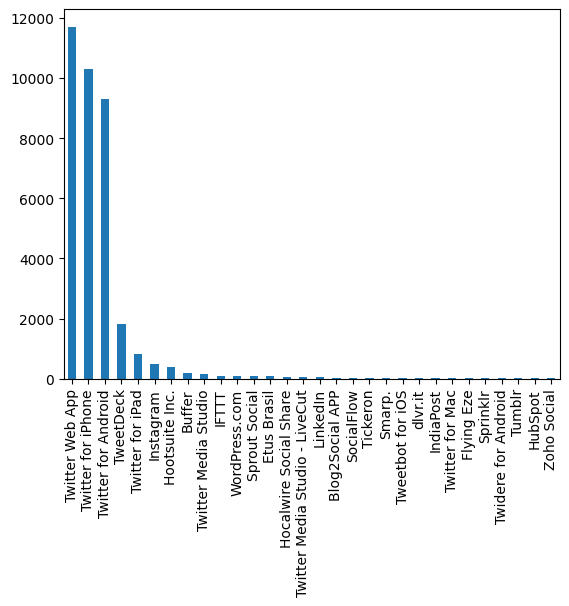

In [ ]:
#plot the top value_counts
df['source'].value_counts().nlargest(30).plot(kind ='bar')

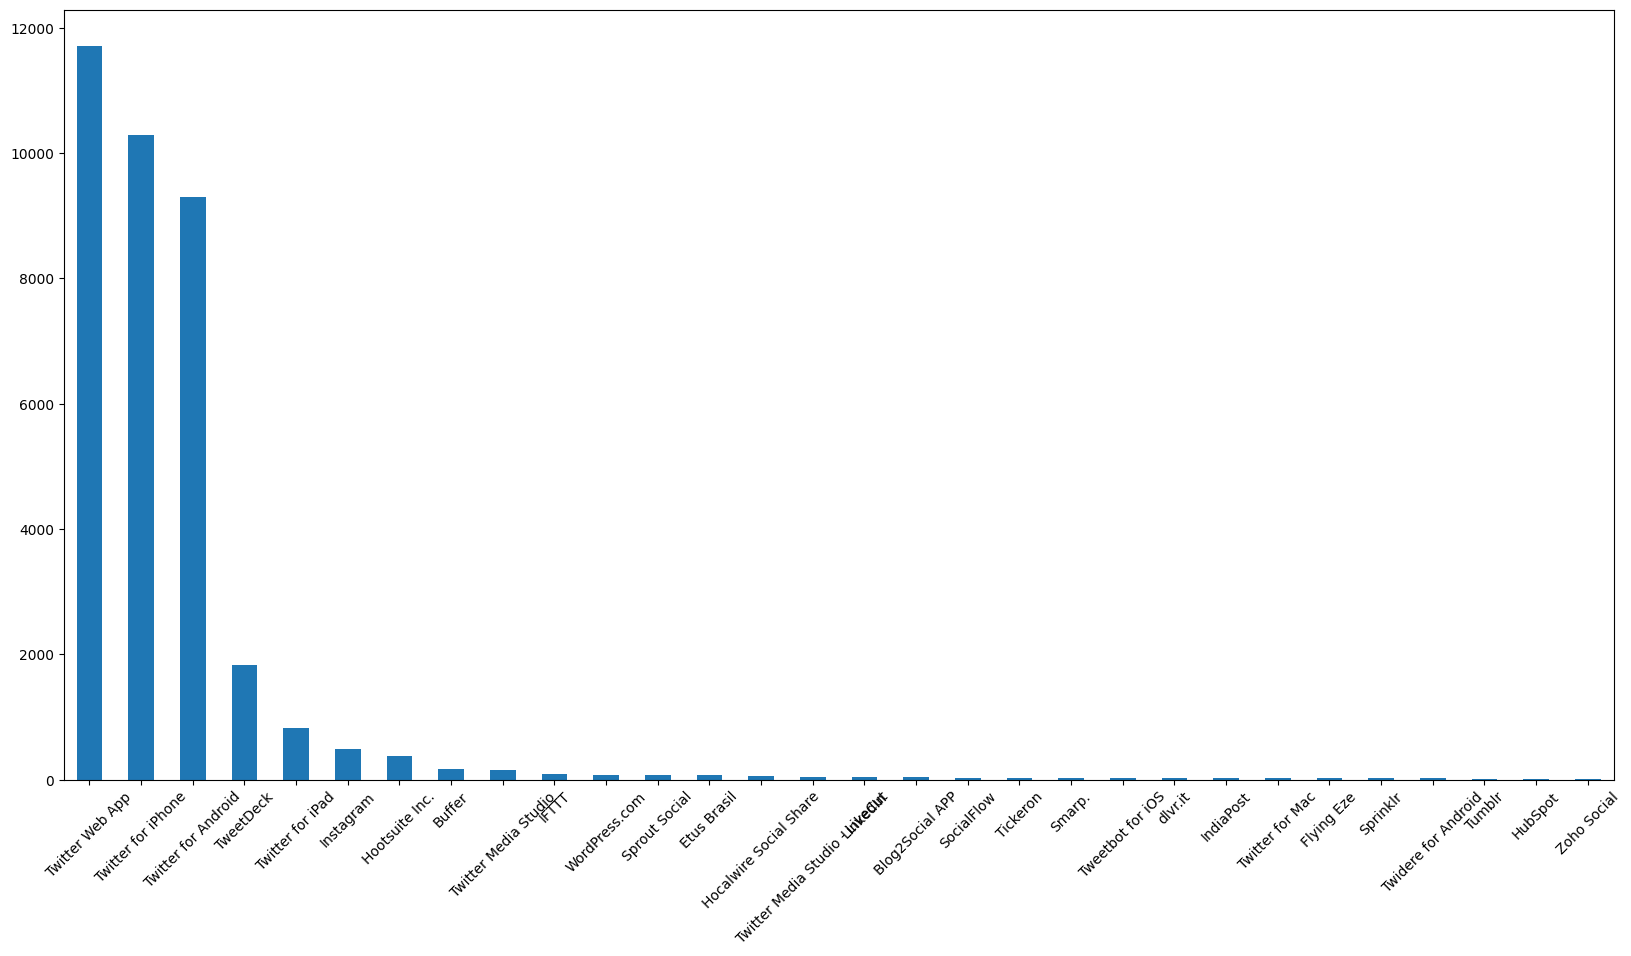

In [ ]:
#plot the top value_counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind ='bar')
plt.xticks(rotation=45)
plt.show()

# Text analysis of tweets

In [ ]:
!pip install neattext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [ ]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['text']

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2        #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3        Facts are immutable, Senator, even when you're...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
36336    @SCMPNews Is the data from sinovac reliable? \...
36337    First jab. #Sinovac. 😀Gracias #Chile #yomevacu...
36338    Our updated table on the Chinese #vaccinediplo...
36339    Defend #WestPhilippineSea from #China . Philip...
36340                                             Presiden
Name: text, Length: 36341, dtype: object

In [ ]:
df['text'].iloc[2]

'#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P'

#Noise

*  remove mentions/userhandles
*  remove hashtags
*  urls
*  emojis
*  special char


In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0.0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1.0,1.0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0.0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446.0,2129.0,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0.0,0.0,False


In [ ]:
df['text'].apply(nfx.extract_hashtags)

0                                        [#PfizerBioNTech]
1                                                       []
2        [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...
3                                                       []
4            [#whereareallthesickpeople, #PfizerBioNTech…]
                               ...                        
36336                                           [#Sinovac]
36337                     [#Sinovac., #Chile, #yomevacuno]
36338                                  [#vaccinediplomacy]
36339                         [#WestPhilippineSea, #China]
36340                                                   []
Name: text, Length: 36341, dtype: object

In [ ]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [ ]:
df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[#PfizerBioNTech],['PfizerBioNTech']
1,[],NaN
2,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
3,[],NaN
4,"[#whereareallthesickpeople, #PfizerBioNTech…]","['whereareallthesickpeople', 'PfizerBioNTech']"
...,...,...
36336,[#Sinovac],['Sinovac']
36337,"[#Sinovac., #Chile, #yomevacuno]","['Sinovac', 'Chile', 'yomevacuno']"
36338,[#vaccinediplomacy],['vaccinediplomacy']
36339,"[#WestPhilippineSea, #China]","['WestPhilippineSea', 'China']"


In [ ]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [ ]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Russian vaccine is created to last...
3,"Facts are immutable, Senator, even when you're...","Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine @Bor...
...,...,...
36336,@SCMPNews Is the data from sinovac reliable? \...,@SCMPNews Is the data from sinovac reliable? \...
36337,First jab. #Sinovac. 😀Gracias #Chile #yomevacu...,First jab. 😀Gracias https://t.co/eQxXoXtbQF
36338,Our updated table on the Chinese #vaccinediplo...,Our updated table on the Chinese around the ...
36339,Defend #WestPhilippineSea from #China . Philip...,Defend from . Philippines should not forge...


In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Russian vaccine is created to last...
3,"Facts are immutable, Senator, even when you're...","Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine ...
...,...,...
36336,@SCMPNews Is the data from sinovac reliable? \...,Is the data from sinovac reliable? \n9 out o...
36337,First jab. #Sinovac. 😀Gracias #Chile #yomevacu...,First jab. 😀Gracias https://t.co/eQxXoXtbQF
36338,Our updated table on the Chinese #vaccinediplo...,Our updated table on the Chinese around the ...
36339,Defend #WestPhilippineSea from #China . Philip...,Defend from . Philippines should not forge...


In [ ]:
df['clean_tweet'].iloc[10]

'while deaths are closing in on the 300,000 mark... millions of people wait     !\n-\nThe first U… https://t.co/uQ3A2f7SVP'

In [ ]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
df['clean_tweet'].iloc[10]

'while deaths are closing in on the 300,000 mark... millions of people wait !\n-\nThe first U… https://t.co/uQ3A2f7SVP'

In [ ]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Russian vaccine is created to last 24 years…
3,"Facts are immutable, Senator, even when you're...",Facts are immutable Senator even when youre no...
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine
...,...,...
36336,@SCMPNews Is the data from sinovac reliable? \...,Is the data from sinovac reliable 9 out of 25...
36337,First jab. #Sinovac. 😀Gracias #Chile #yomevacu...,First jab 😀Gracias
36338,Our updated table on the Chinese #vaccinediplo...,Our updated table on the Chinese around the gl...
36339,Defend #WestPhilippineSea from #China . Philip...,Defend from Philippines should not forget oth...


In [ ]:
# Contraction handling :
!pip install contractions
import contractions

def handle_contractions(text):
    return contractions.fix(text)

df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

df['clean_tweet'] = df['clean_tweet'].apply(handle_contractions)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.8 MB/s eta 0:00:00


Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Text
ex1 = df['clean_tweet'].iloc[0]
get_sentiment(ex1)
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [ ]:
df['sentiment_results']

0        {'polarity': 0.0, 'subjectivity': 0.125, 'sent...
1        {'polarity': -0.5, 'subjectivity': 0.9, 'senti...
2        {'polarity': 0.0, 'subjectivity': 0.0333333333...
3        {'polarity': -0.05, 'subjectivity': 0.55, 'sen...
4        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                               ...                        
36336    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
36337    {'polarity': 0.25, 'subjectivity': 0.333333333...
36338    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
36339    {'polarity': -0.125, 'subjectivity': 0.375, 's...
36340    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 36341, dtype: object

In [ ]:
df['sentiment_results'].iloc[0]

{'polarity': 0.0, 'subjectivity': 0.125, 'sentiment': 'Neutral'}

In [ ]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.0,0.125,Neutral


In [ ]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,Twitter for Android,0.0,0.0,False,[#PfizerBioNTech],Same folks said daikon paste could treat a cyt...,"{'polarity': 0.0, 'subjectivity': 0.125, 'sent...",0.00,0.125000,Neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,Twitter Web App,1.0,1.0,False,[],While the world has been on the wrong side of ...,"{'polarity': -0.5, 'subjectivity': 0.9, 'senti...",-0.50,0.900000,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,Twitter for Android,0.0,0.0,False,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",Russian vaccine is created to last 24 years…,"{'polarity': 0.0, 'subjectivity': 0.0333333333...",0.00,0.033333,Neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,Twitter Web App,446.0,2129.0,False,[],Facts are immutable Senator even when you are ...,"{'polarity': -0.05, 'subjectivity': 0.55, 'sen...",-0.05,0.550000,Negative
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,Twitter for iPhone,0.0,0.0,False,"[#whereareallthesickpeople, #PfizerBioNTech…]",Explain to me again why we need a vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [ ]:
df['sentiment'].value_counts()

Neutral     17074
Positive    14979
Negative     4288
Name: sentiment, dtype: int64

<Axes: >

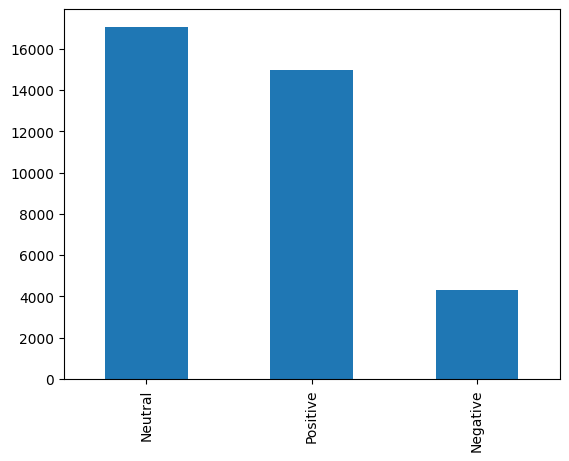

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='sentiment', ylabel='count'>

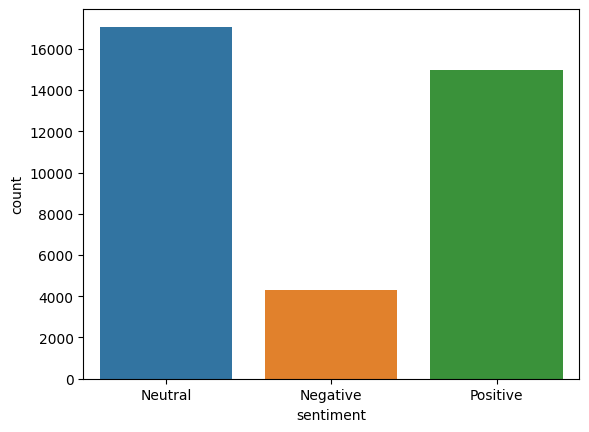

In [ ]:
import seaborn as sns

sns.countplot(data=df, x='sentiment')

### Keyword Extraction


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the clean_tweet data
X = vectorizer.fit_transform(df['clean_tweet'])

# Get the feature names (i.e., the words)
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF scores for the first document (you can change this to any document you're interested in)
doc = 0  # Change this to the index of the document you want to look at
feature_index = X[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [X[doc, x] for x in feature_index])

# Print out the keywords and their TF-IDF scores
for word, score in [(feature_names[i], score) for (i, score) in tfidf_scores]:
    print(word, score)

from collections import Counter

def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result


# Filter the DataFrame for positive tweets
positive_tweets = df[df['sentiment'] == 'Positive']['clean_tweet']

# Tokenize the positive tweets
pos_tokens = [word for tweet in positive_tweets for word in tweet.split()]



storm 0.3662970406303449
cytokine 0.4201957783442773
treat 0.33266618176379703
could 0.21449137529301998
paste 0.4201957783442773
daikon 0.4201957783442773
said 0.2011862219140688
folks 0.2860612257815054
same 0.23906639718355083


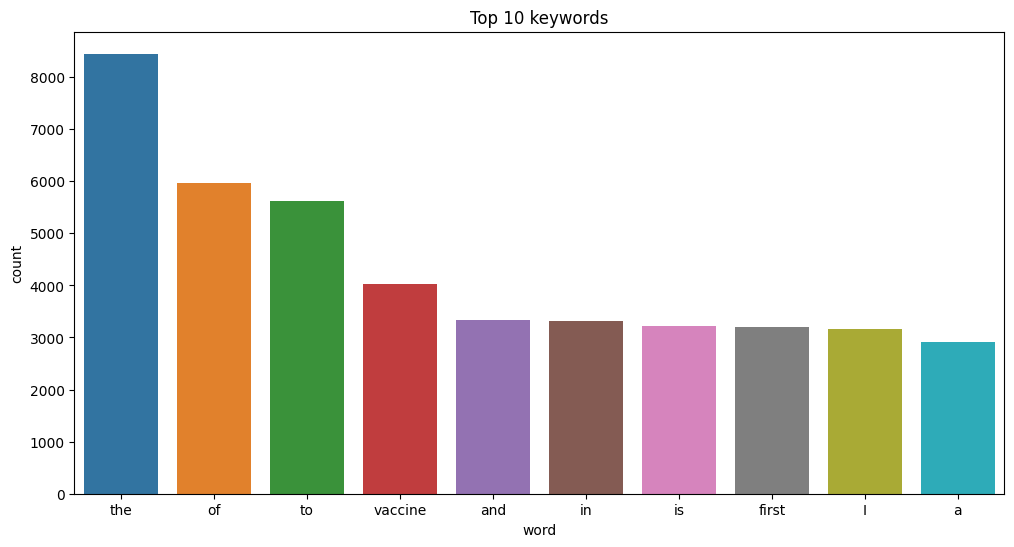

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

word_counts = get_tokens(pos_tokens)

# Convert the dictionary to a DataFrame
df_word_counts = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Plot the top 10 words
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_word_counts.sort_values('count', ascending=False).head(10))
plt.title('Top 10 keywords')
plt.show()


### Feature Extraction


In [ ]:
# Initialize a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the clean_tweet data and transform the data
X = vectorizer.fit_transform(df['clean_tweet'])

# X is now a matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary.
# The value in each cell is the TF-IDF score of the word in the document.


In [ ]:
# Define y
y = df['sentiment']

In [ ]:
#Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Choosing the model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [ ]:
#Model training
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Model evaluation
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.767780987756225


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.92      0.08      0.15       862
     Neutral       0.82      0.84      0.83      3440
    Positive       0.71      0.89      0.79      2967

    accuracy                           0.77      7269
   macro avg       0.82      0.60      0.59      7269
weighted avg       0.79      0.77      0.73      7269

